## Assess fits for Mw and Sc by evaluation of leaver's equations. Inputting the fits into these equations should yield very small numbers indicative of a solution.

In [135]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Import useful things from kerr
from kerr.formula.ksm2_cw import CW as cwfit
from kerr.formula.ksm2_sc import SC as scfit
from kerr.pttools import leaver_workfunction as lvrwork
from kerr import leaver,rgb

# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 18
tfs = 9
mpl.rcParams['xtick.labelsize'] = tfs
mpl.rcParams['ytick.labelsize'] = tfs
mpl.rcParams['mathtext.bf'] = 'True'
from matplotlib.pyplot import *

# Other useful things
from numpy import sin,cos,log,exp,pi,linspace,zeros,linalg,array,mod


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
# Combine the above operations into a function
def plotlvrwork(l,m,n,ax=None):
    from numpy import pi,sin,zeros,array,linalg
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_weight('bold')
    # Define a region in final spin to use for the test
    jf_range = 0.995 * sin( (pi/2)*linspace(-1,1,3e2) )

    # For each spin value 
    x = [zeros( jf_range.shape,dtype=complex ),zeros( jf_range.shape,dtype=complex ),zeros( jf_range.shape,dtype=complex ),zeros( jf_range.shape,dtype=complex )]
    z = zeros( jf_range.shape,dtype=complex )
    for k,jf in enumerate(jf_range):
        # Call the fit functions to get a fit to the solutions of leaver's equations
        cw = cwfit[(l,m,n)](jf)
        sc = scfit[(l,m,n)](jf)
        # 
        state = [ cw.real, -cw.imag, sc.real, sc.imag ]
        x[0][k],x[1][k],x[2][k],x[3][k] = array(lvrwork( jf,l,m, state ))
        z[k] = linalg.norm( array( [x[v][k] for v in range(len(x))] ) )
    
    # Prepare plotting
    if ax is None:
        fig = figure( figsize=2.5*array([3,3]) )
    else:
        sca(ax)
    
    #
    clr = ['r','#ff9999','#B8B8B8','#181818'] # rgb(len(x),shift=1.2)
    lsty = ['-','-','-','-']
    for k in range(len(x)):
        plot( jf_range,x[k],lsty[k],alpha=0.8,lw=1,color=clr[k] )
    # plot(jf_range,z,'--k',lw=1)
    xlabel('$j_f$')
    ylabel('$\epsilon_{%i%i%i}(j_f)$'%(l,m,n))

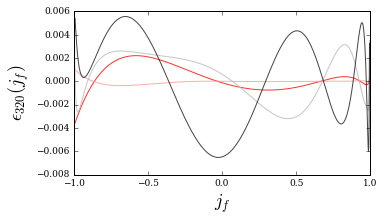

In [140]:
# Prepare plotting
fig,ax = subplots(1,1,figsize=5*array([1.15,0.62]))
# tight_layout(pad=4)
eps = 0.08
tight_layout(rect=[0+eps,0+eps,1-eps,1])

#
l,m,n = 3,2,0
plotlvrwork(l,m,n,ax=ax)

#
savefig('../test_python_fit_equations_l%im%in%i.pdf'%(l,m,n))

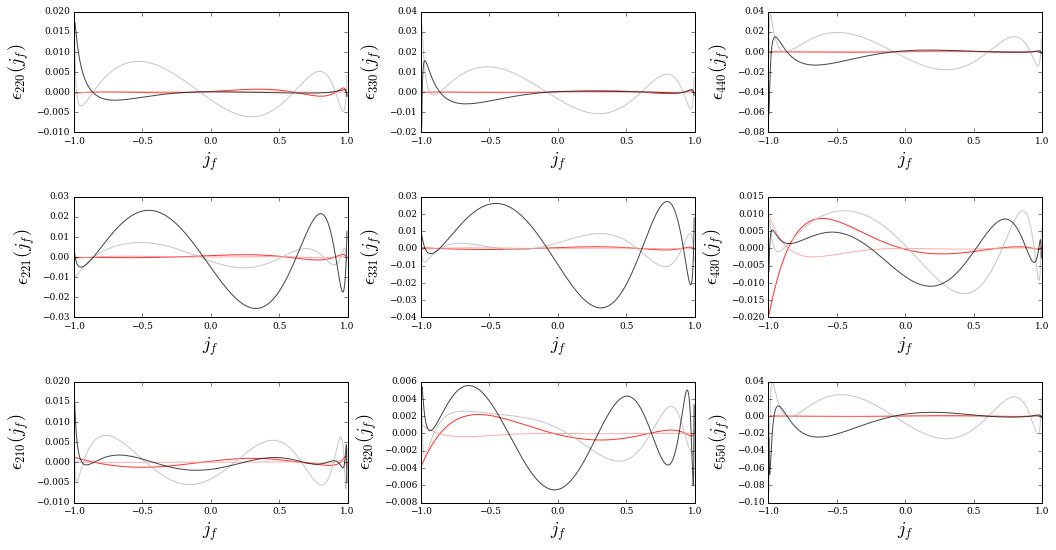

In [143]:
#
close('all')

# Define fit multipoles
lmn = [(2,2,0),(2,2,1),(2,1,0),(3,3,0),(3,3,1),(3,2,0),(4,4,0),(4,3,0),(5,5,0)]

# Define length scale for plot
plotscale = len(lmn)/3

# Setup axes array and figure
fig,axarr = subplots(plotscale, plotscale,figsize=13*array( [1.15,0.62] ))
tight_layout(pad=3, w_pad=4, h_pad=4,rect=[0.01,0.002,1,1])
# tight_layout(rect=[0.1,0.052,1.02,0.948])

# Plot to axes
for k,(l,m,n) in enumerate(lmn):
    a = mod(k,3)
    b = k/plotscale
    plotlvrwork(l,m,n,ax = axarr[a,b] )
    
# Save figure
savefig('test_python_fit_equations.pdf')

In [47]:
# ?tight_layout